# Incremental Capstone Session 9: Customer Churn Prediction with Deep Neural Networks

## Objective
Build a deep neural network model to predict customer churn using TensorFlow/Keras.

## Dataset Overview
- **Dataset**: Churn_Modeling.csv
- **Records**: 10,000 customers
- **Target Variable**: Exited (1 = churned, 0 = retained)
- **Features**: Customer demographics, banking details, and engagement metrics

### This is a binary classification problem

## 1. Import Required Libraries

## TROUBLESHOOTING: If Kernel Keeps Crashing

If you experience kernel crashes, try these solutions in order:

### Solution 1: Use TensorFlow CPU-only
Run this in a terminal before starting Jupyter:
```bash
pip install tensorflow-cpu
pip uninstall tensorflow tensorflow-gpu
```

### Solution 2: Alternative Environment Setup
If the setup cells below don't work, create a file called `setup_env.py` with:
```python
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
```
Then run: `python setup_env.py` before starting Jupyter

### Solution 3: Minimal Setup
Skip the environment setup cells and just run:
```python
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')  # Force CPU
```

**Now proceed with the setup cells below:**

In [ ]:
# IMPORTANT: Run this cell first and DO NOT restart kernel
import os
import warnings
warnings.filterwarnings('ignore')

# Force CPU-only TensorFlow to avoid CUDA conflicts
os.environ['CUDA_VISIBLE_DEVICES'] = ''  # Empty string is more reliable than '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress all TensorFlow messages
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'false'

# Disable problematic optimizations
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_DISABLE_MKL'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'

print("Environment configured for CPU-only TensorFlow")
print("Now run the next cell to import libraries")

Environment configured for CPU-only TensorFlow
Now run the next cell to import libraries


: 

In [1]:
# Import libraries with error handling
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
    
    # Import TensorFlow with additional safeguards
    import tensorflow as tf
    
    # Force CPU usage after import
    tf.config.set_visible_devices([], 'GPU')
    
    from tensorflow import keras
    from tensorflow.keras import layers
    
    print("All libraries imported successfully!")
    print(f"TensorFlow version: {tf.__version__}")
    print(f"Keras version: {keras.__version__}")
    print(f"NumPy: {np.__version__}")
    print(f"Pandas: {pd.__version__}")
    print(f"Scikit-learn: {sklearn.__version__}")
    print(f"Using device: CPU (CUDA disabled)")
    
except Exception as e:
    print(f"Import error: {e}")
    print("Try restarting the kernel and running cells in order")

2025-09-17 10:46:06.547005: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-17 10:46:06.558863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-17 10:46:06.576181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-17 10:46:06.580927: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-17 10:46:06.594331: I tensorflow/core/platform/cpu_feature_guar

All libraries imported successfully!
TensorFlow version: 2.17.1
Keras version: 3.11.3
NumPy: 1.26.4
Pandas: 2.2.3
Scikit-learn: 1.4.2
Using device: CPU (CUDA disabled)


I0000 00:00:1758123968.882180  671055 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-17 10:46:09.283016: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 2. Data Loading and Exploration

In [2]:
# Load the dataset
df = pd.read_csv('Churn_Modeling.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
df.head()

Dataset Shape: (10000, 14)

Column Names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check data types and missing values
print("Data Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
Cre

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Churn Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn Rate: 20.37%


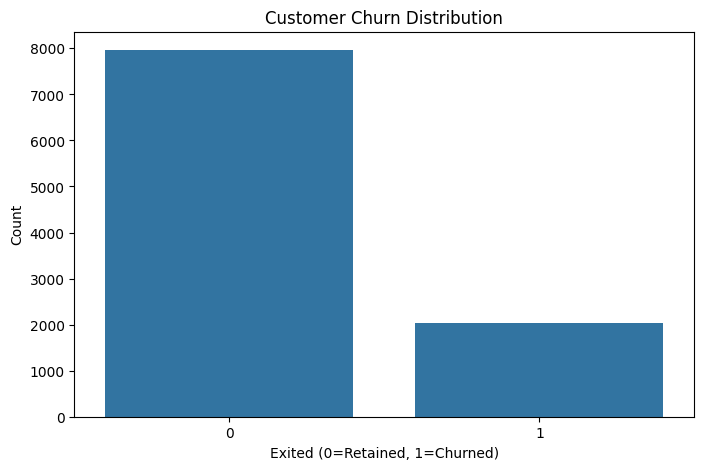

In [4]:
# Analyze target variable distribution
print("Churn Distribution:")
churn_counts = df['Exited'].value_counts()
print(churn_counts)
print(f"\nChurn Rate: {churn_counts[1] / len(df) * 100:.2f}%")

# Visualize churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Exited')
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0=Retained, 1=Churned)')
plt.ylabel('Count')
plt.show()

## 3. Exploratory Data Analysis

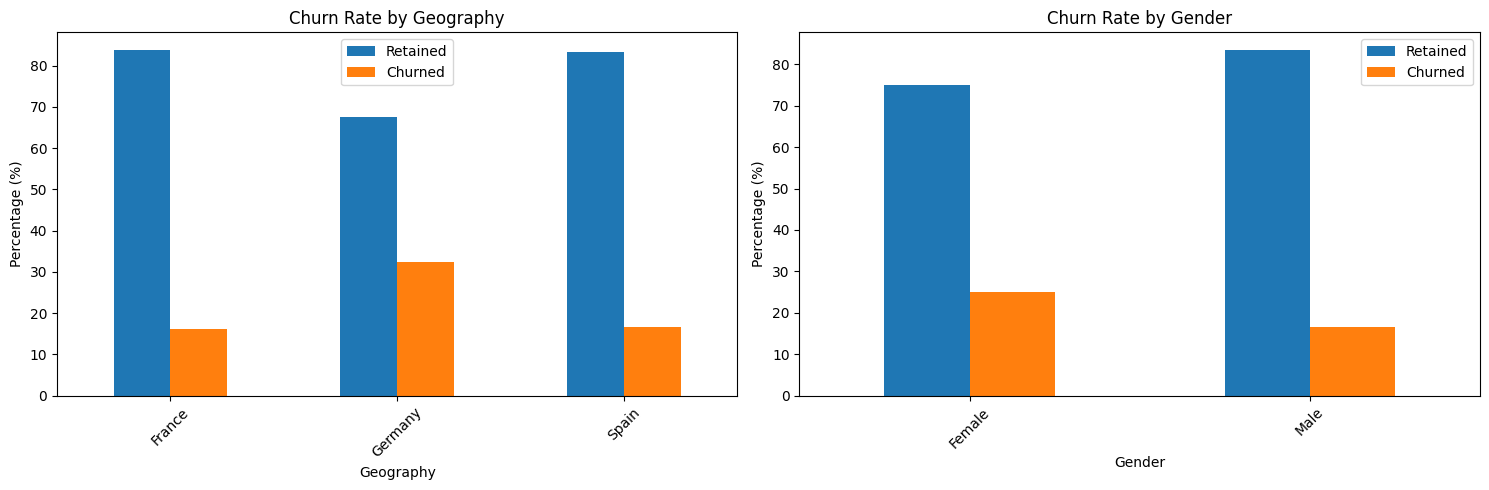

In [5]:
# Analyze categorical features
categorical_cols = ['Geography', 'Gender']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    churn_by_category = pd.crosstab(df[col], df['Exited'], normalize='index') * 100
    churn_by_category.plot(kind='bar', ax=axes[i], rot=45)
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

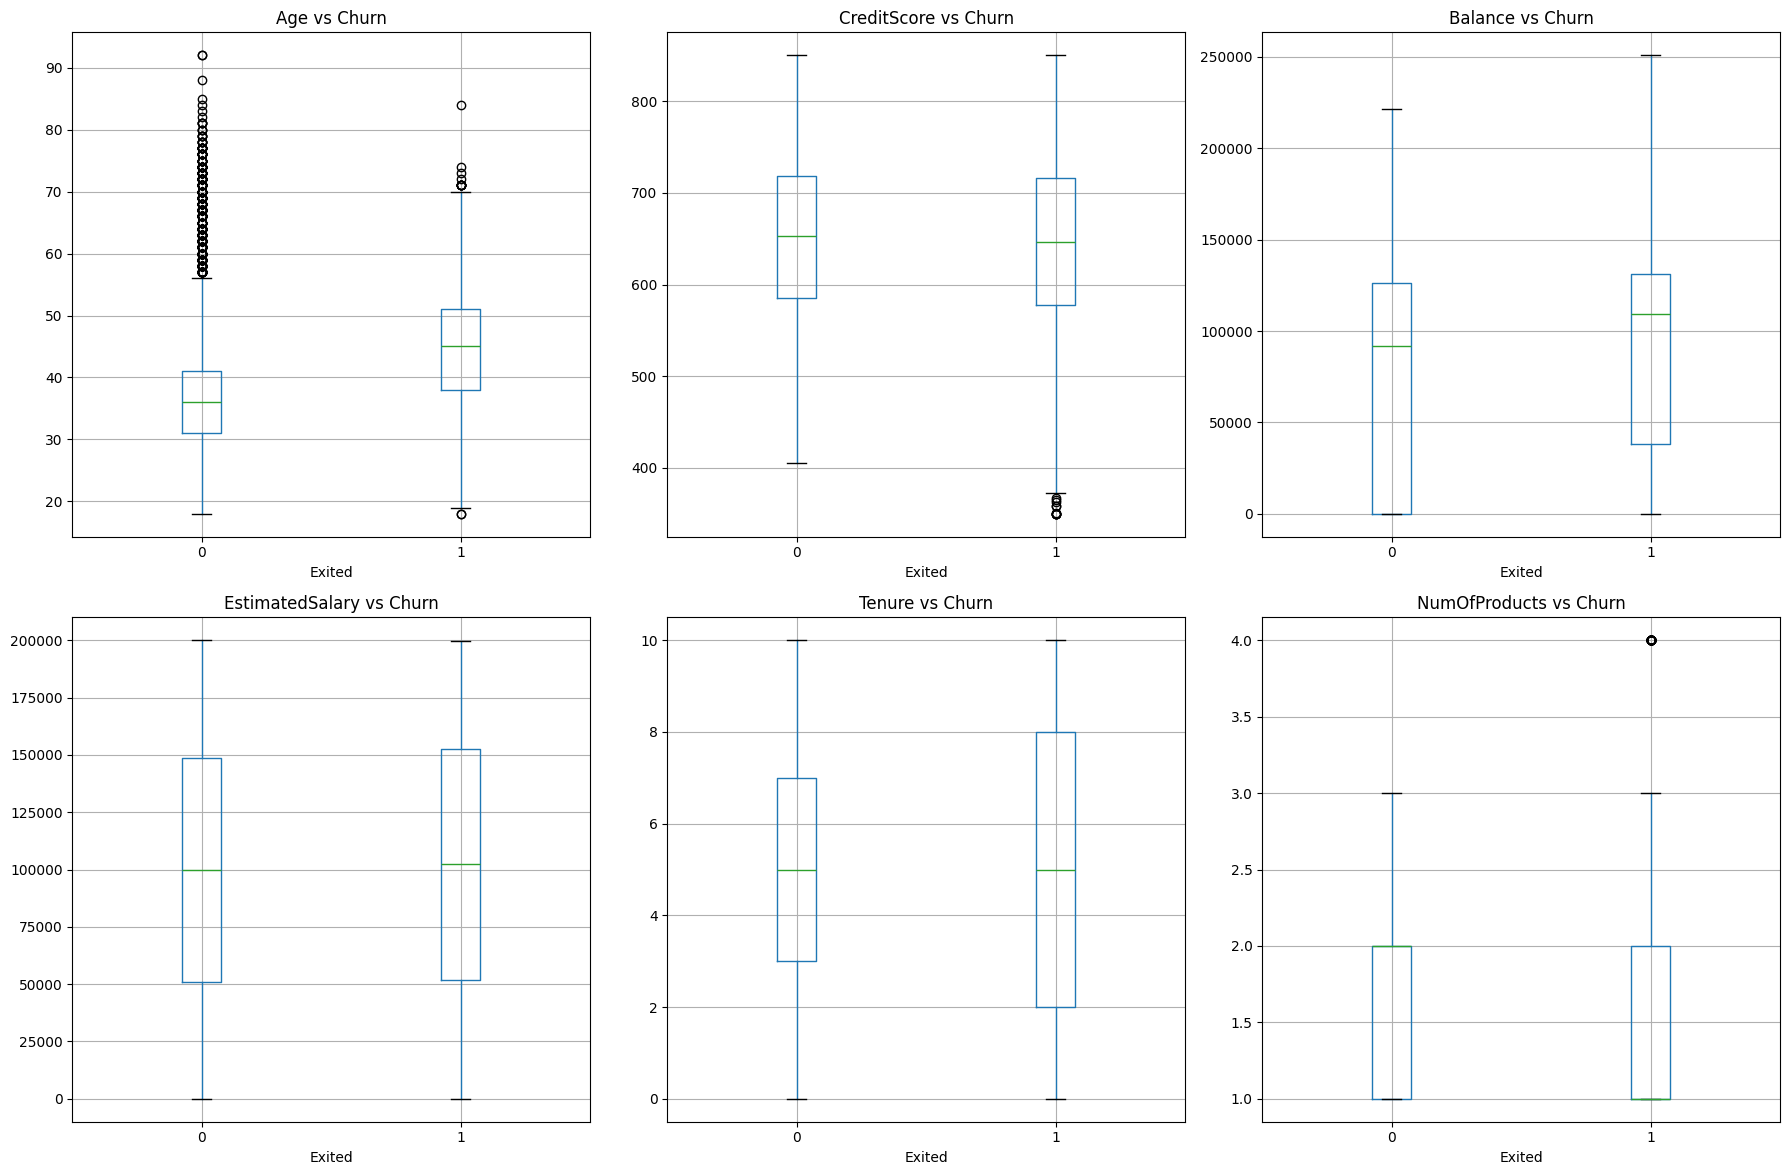

In [6]:
# Analyze numerical features vs churn
numerical_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='Exited', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Exited')

plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.show()

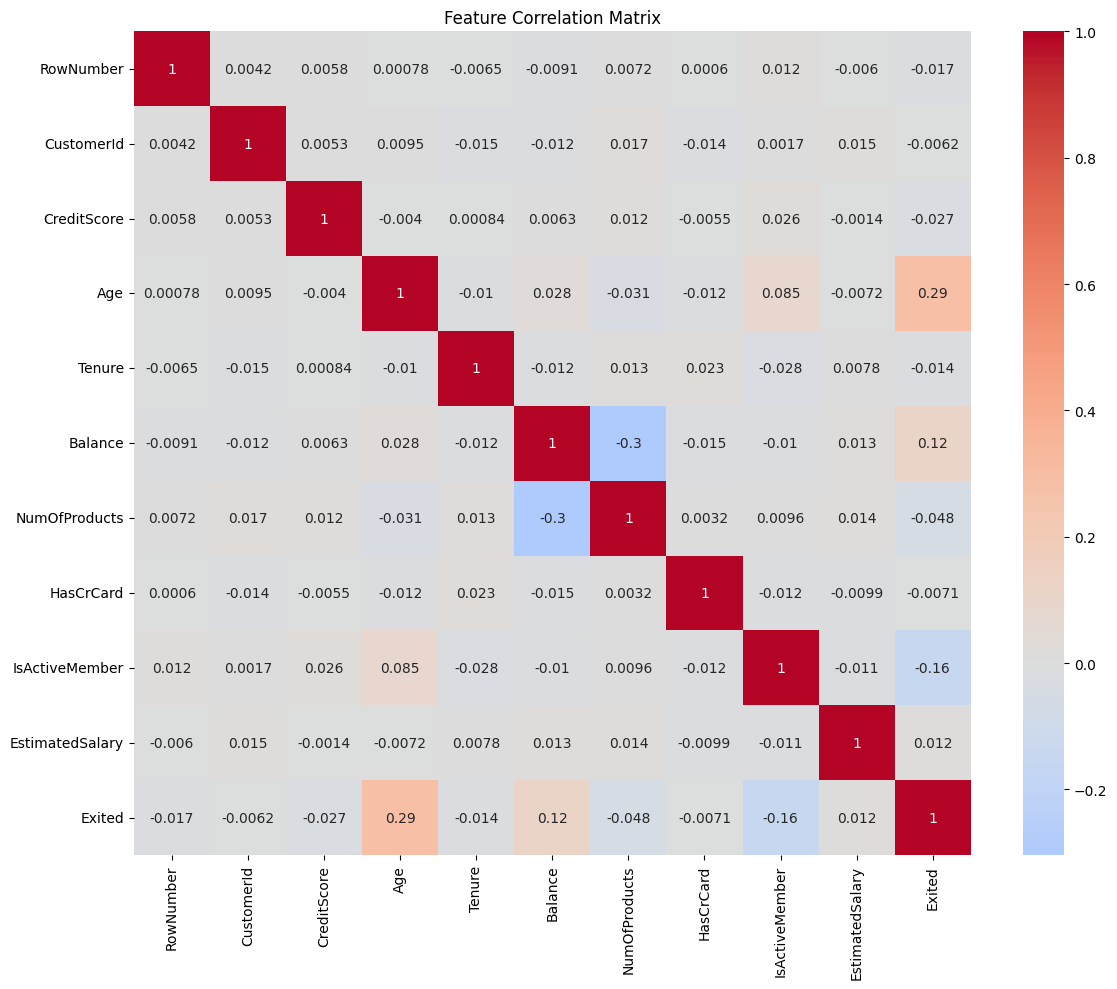

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Create a copy for preprocessing
df_processed = df.copy()

# Remove unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_processed = df_processed.drop(columns=columns_to_drop)

print("Columns after dropping unnecessary features:")
print(df_processed.columns.tolist())
print(f"Shape: {df_processed.shape}")

Columns after dropping unnecessary features:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Shape: (10000, 11)


In [9]:
# Encode categorical variables
# Geography: One-hot encoding
geography_encoded = pd.get_dummies(df_processed['Geography'], prefix='Geography')
df_processed = pd.concat([df_processed, geography_encoded], axis=1)
df_processed = df_processed.drop('Geography', axis=1)

# Gender: Binary encoding
le_gender = LabelEncoder()
df_processed['Gender'] = le_gender.fit_transform(df_processed['Gender'])

print("Columns after encoding:")
print(df_processed.columns.tolist())
print(f"Shape: {df_processed.shape}")

Columns after encoding:
['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain']
Shape: (10000, 13)


In [10]:
# Separate features and target
X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {X.columns.tolist()}")

Features shape: (10000, 12)
Target shape: (10000,)
Feature columns: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# Check class distribution in splits
print(f"\nTraining set churn rate: {y_train.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")

Training set: (8000, 12), (8000,)
Test set: (2000, 12), (2000,)

Training set churn rate: 0.204
Test set churn rate: 0.203


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")

# Check scaling results
print(f"\nTraining data - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print(f"Test data - Mean: {X_test_scaled.mean():.6f}, Std: {X_test_scaled.std():.6f}")

Scaled training features shape: (8000, 12)
Scaled test features shape: (2000, 12)

Training data - Mean: -0.000000, Std: 1.000000
Test data - Mean: -0.004009, Std: 1.000249


## 5. Deep Neural Network Model Building

> NOTE: Using 5 dense layers instead of 2 to capture more complex patterns, control overfitting, and engage my curiosity

In [13]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Display model architecture
model.summary()

/home/jbenton/projects/sandbox/teach/teach/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

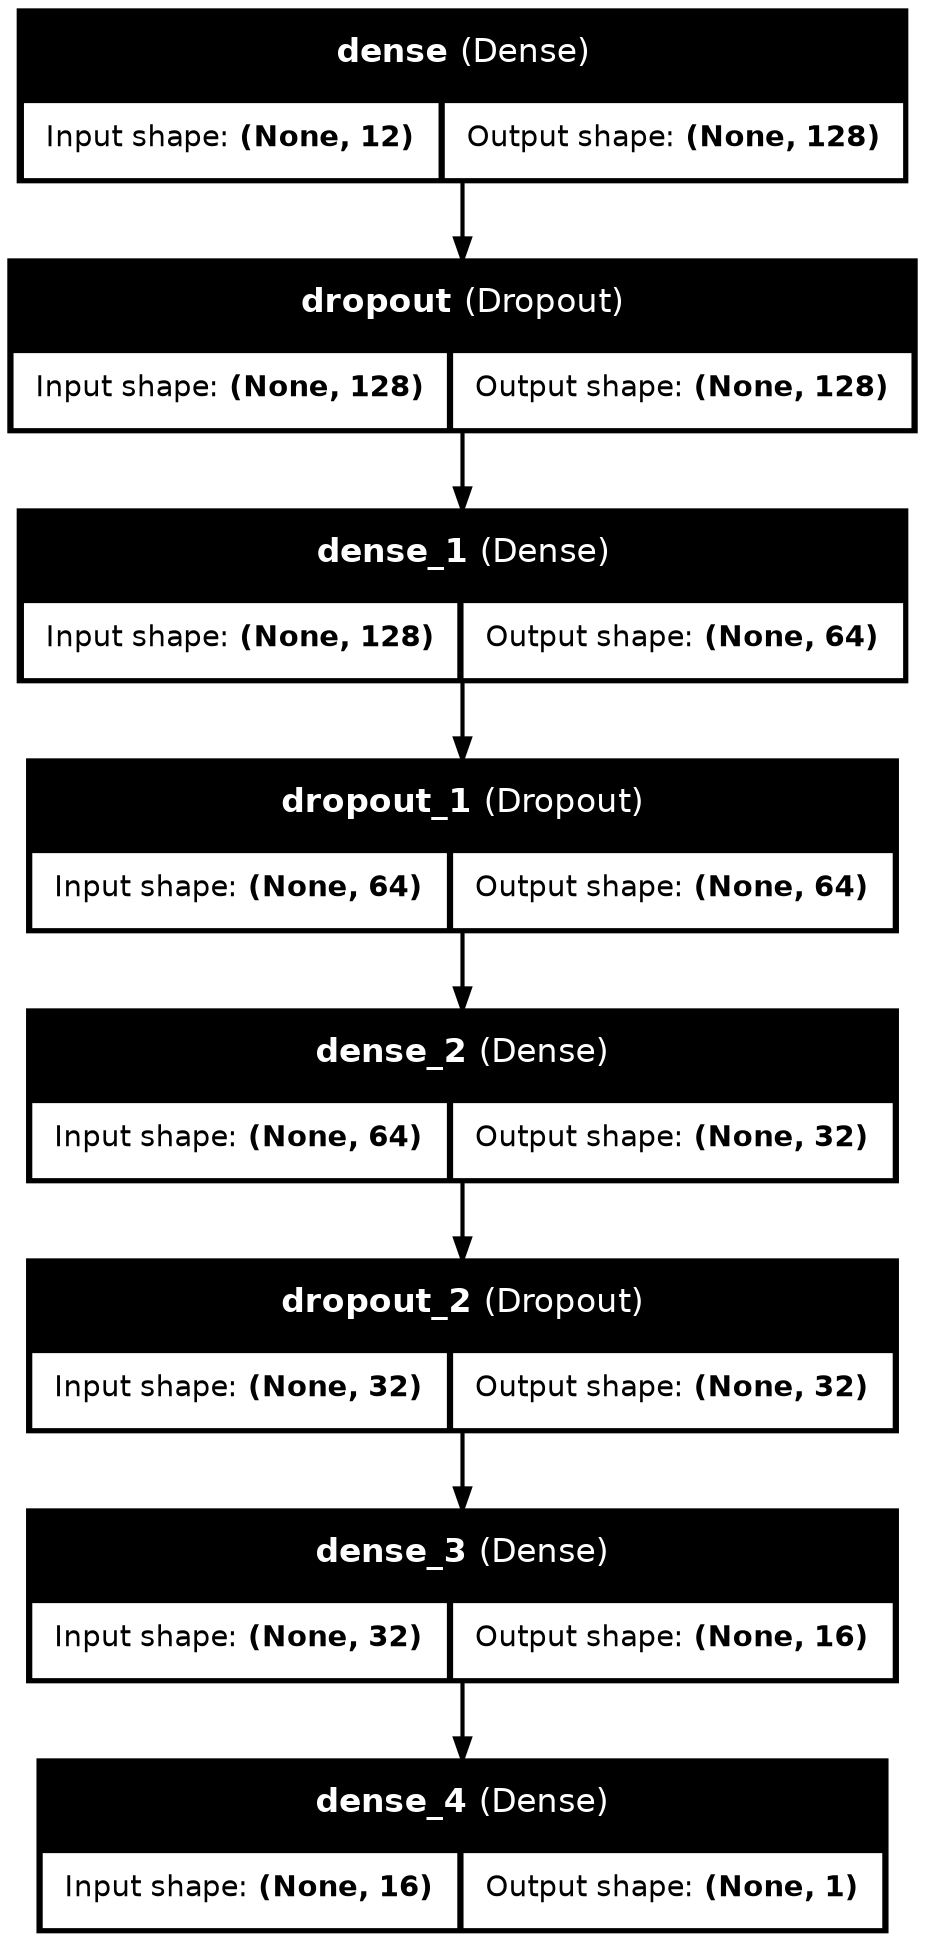

In [14]:
# Visualize the model architecture
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=150)

## 6. Model Training

In [15]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7972 - loss: 0.4725 - precision: 0.5455 - recall: 0.0550 - val_accuracy: 0.8181 - val_loss: 0.4257 - val_precision: 0.6526 - val_recall: 0.1937 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4293 - precision: 0.6444 - recall: 0.2214 - val_accuracy: 0.8388 - val_loss: 0.3909 - val_precision: 0.7153 - val_recall: 0.3219 - learning_rate: 0.0010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8302 - loss: 0.4052 - precision: 0.6831 - recall: 0.3176 - val_accuracy: 0.8600 - val_loss: 0.3646 - val_precision: 0.8333 - val_recall: 0.3750 - learning_rate: 0.0010
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.3887 - precision: 0.6951 - recall: 0.3481 - val_accuracy: 0.8644 - val_loss: 0.3427 - val_precision: 0.8047 - val_recall: 0.4250 - learning_rate: 0.0010
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

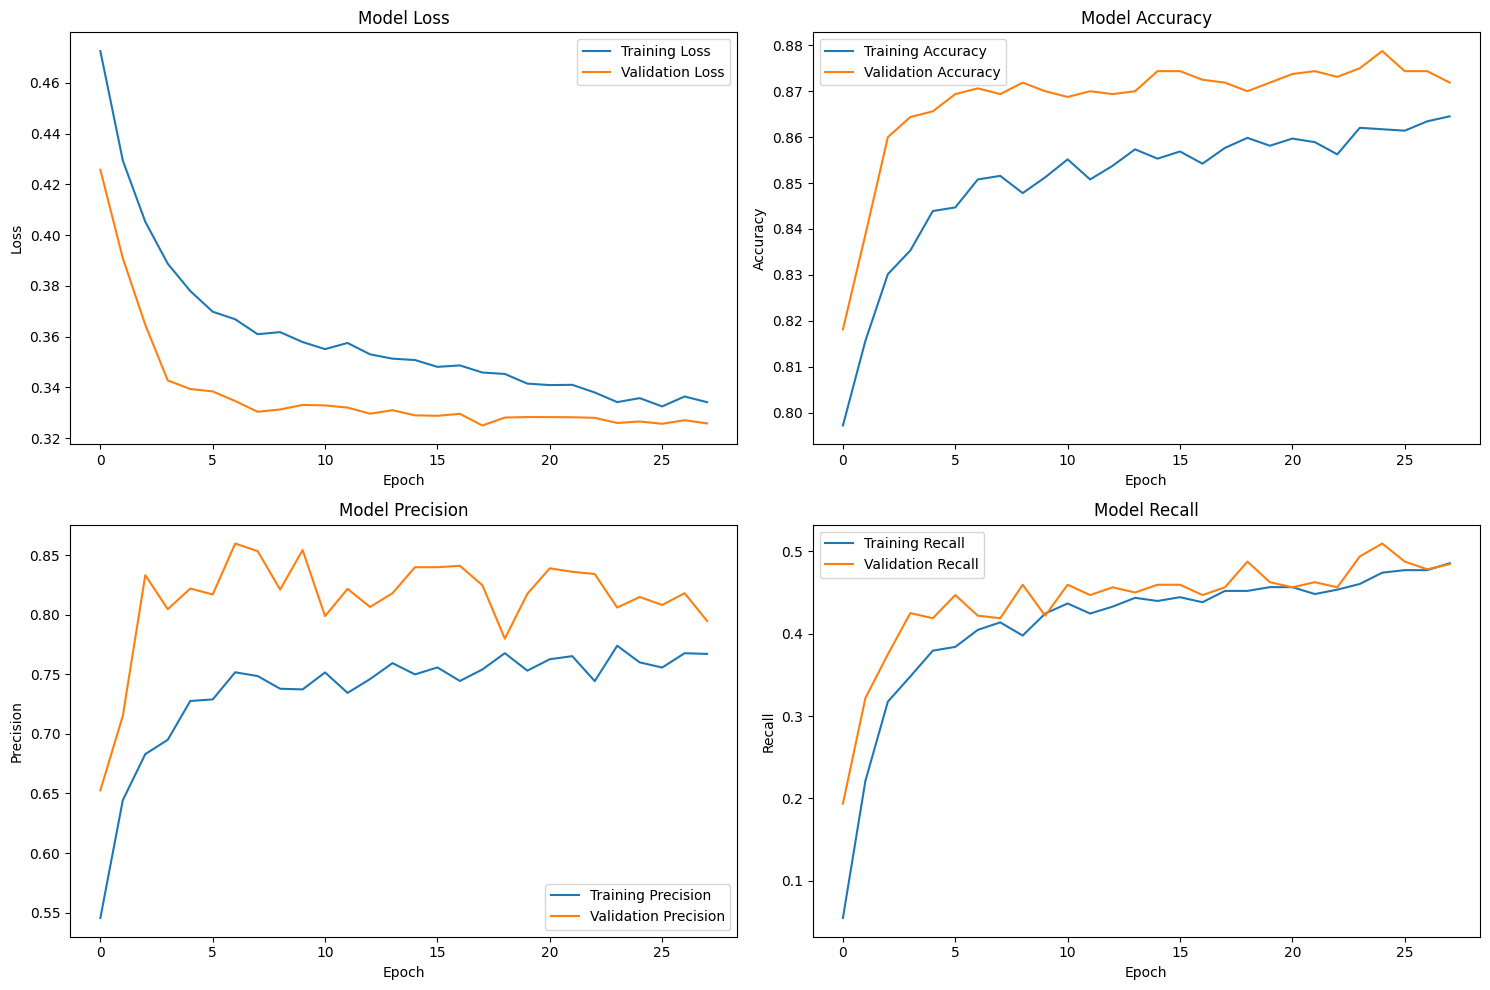

In [16]:
# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Precision
axes[1, 0].plot(history.history['precision'], label='Training Precision')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
axes[1, 0].set_title('Model Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()

# Recall
axes[1, 1].plot(history.history['recall'], label='Training Recall')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
axes[1, 1].set_title('Model Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 7. Model Evaluation

In [17]:
# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate metrics
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=0)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("Model Performance on Test Set:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"F1 Score: {2 * (test_precision * test_recall) / (test_precision + test_recall):.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Performance on Test Set:
Test Loss: 0.3380
Test Accuracy: 0.8640
Test Precision: 0.8111
Test Recall: 0.4324
AUC Score: 0.8607
F1 Score: 0.5641


In [18]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

Classification Report:
              precision    recall  f1-score   support

    Retained       0.87      0.97      0.92      1593
     Churned       0.81      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



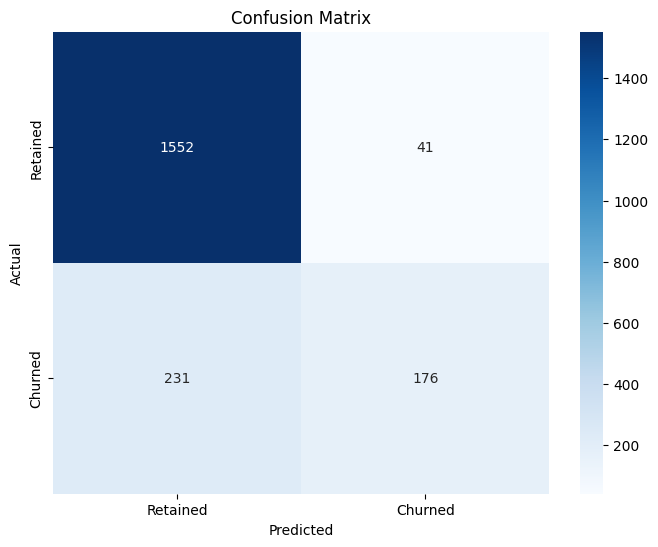


Confusion Matrix (Percentages):
True Negatives (Correctly predicted retained): 97.4%
False Positives (Incorrectly predicted churned): 2.6%
False Negatives (Incorrectly predicted retained): 56.8%
True Positives (Correctly predicted churned): 43.2%


In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate and display confusion matrix percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
print("\nConfusion Matrix (Percentages):")
print(f"True Negatives (Correctly predicted retained): {cm_percent[0,0]:.1f}%")
print(f"False Positives (Incorrectly predicted churned): {cm_percent[0,1]:.1f}%")
print(f"False Negatives (Incorrectly predicted retained): {cm_percent[1,0]:.1f}%")
print(f"True Positives (Correctly predicted churned): {cm_percent[1,1]:.1f}%")

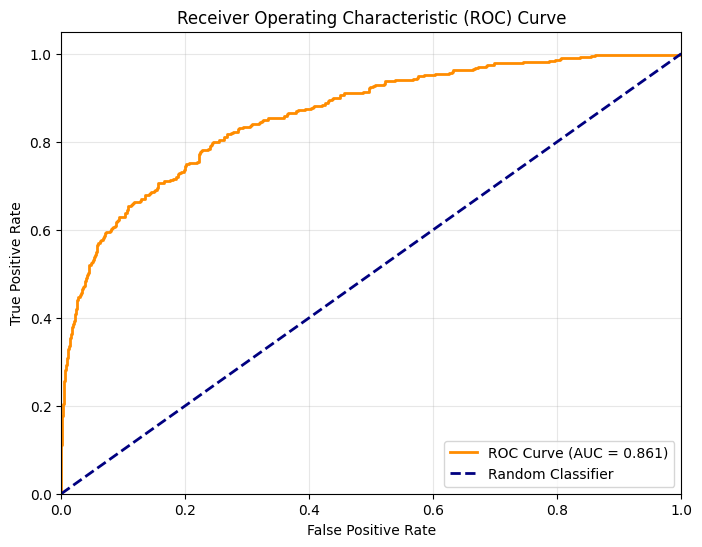

In [20]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_671055/1831850514.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_pred_proba[y_test == 0].flatten(), y_pred_proba[y_test == 1].flatten()],


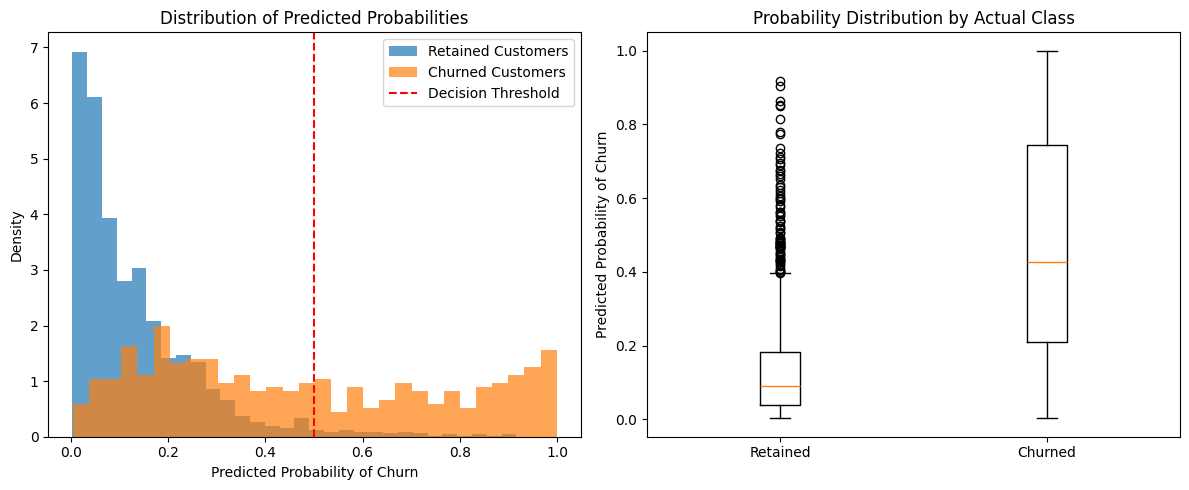

In [21]:
# Prediction probability distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Retained Customers', density=True)
plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Churned Customers', density=True)
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([y_pred_proba[y_test == 0].flatten(), y_pred_proba[y_test == 1].flatten()], 
            labels=['Retained', 'Churned'])
plt.ylabel('Predicted Probability of Churn')
plt.title('Probability Distribution by Actual Class')

plt.tight_layout()
plt.show()

## 8. Feature Importance Analysis

In [22]:
# Simple feature importance using permutation
def calculate_feature_importance(model, X_test, y_test, feature_names):
    baseline_score = model.evaluate(X_test, y_test, verbose=0)[1]  # accuracy
    importance_scores = []
    
    for i in range(X_test.shape[1]):
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, i])
        permuted_score = model.evaluate(X_test_permuted, y_test, verbose=0)[1]
        importance = baseline_score - permuted_score
        importance_scores.append(importance)
    
    return importance_scores

# Calculate feature importance
feature_names = X.columns.tolist()
importance_scores = calculate_feature_importance(model, X_test_scaled, y_test, feature_names)

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

print("Feature Importance (Permutation-based):")
print(feature_importance_df)

Feature Importance (Permutation-based):
              feature  importance
5       NumOfProducts      0.0645
2                 Age      0.0630
7      IsActiveMember      0.0295
0         CreditScore      0.0075
4             Balance      0.0070
1              Gender      0.0065
10  Geography_Germany      0.0060
3              Tenure      0.0045
9    Geography_France      0.0010
6           HasCrCard      0.0005
8     EstimatedSalary      0.0000
11    Geography_Spain      0.0000


/tmp/ipykernel_671055/3366996025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, y='feature', x='importance', palette='viridis')


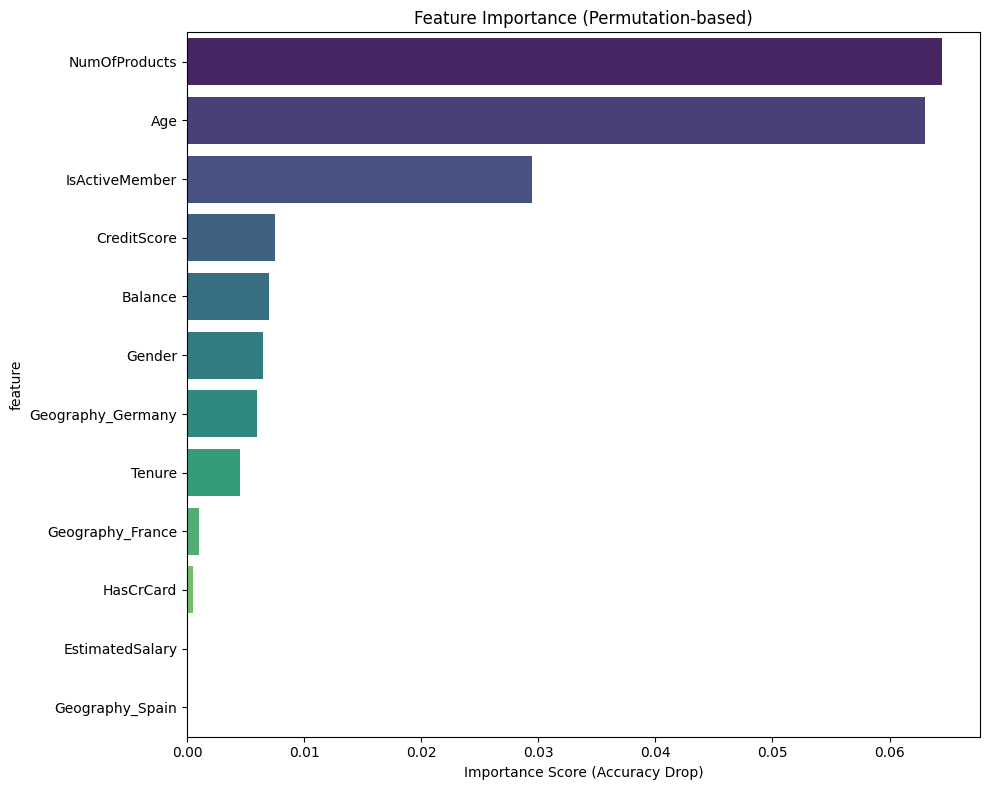

In [23]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, y='feature', x='importance', palette='viridis')
plt.title('Feature Importance (Permutation-based)')
plt.xlabel('Importance Score (Accuracy Drop)')
plt.tight_layout()
plt.show()

## 9. Model Interpretability and Insights

Churn Analysis by Age Group:
          actual_churn        predicted_proba
                 count   mean            mean
age_group                                    
<30                399  0.063           0.072
30-39              868  0.114           0.139
40-49              492  0.350           0.321
50-59              152  0.586           0.476
60+                 89  0.247           0.282


/tmp/ipykernel_671055/3446778936.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = test_df.groupby('age_group').agg({
/tmp/ipykernel_671055/3446778936.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = test_df.groupby('age_group')['actual_churn'].agg(['mean', 'count']).reset_index()
/tmp/ipykernel_671055/3446778936.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats['predicted_m

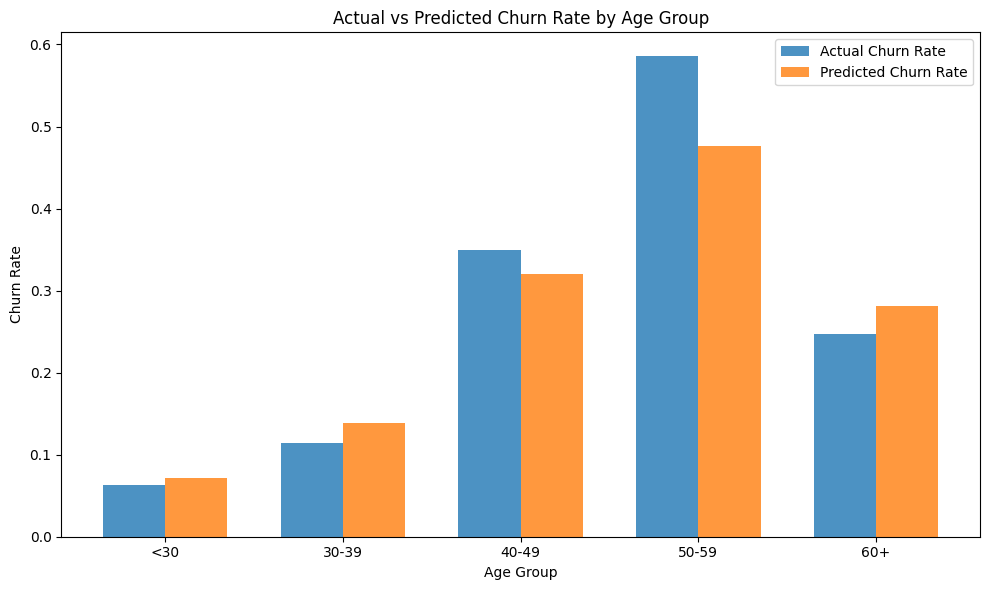

In [24]:
# Analyze predictions by key features
test_df = X_test.copy()
test_df['actual_churn'] = y_test.values
test_df['predicted_proba'] = y_pred_proba.flatten()
test_df['predicted_churn'] = y_pred

# Age analysis
age_bins = [0, 30, 40, 50, 60, 100]
test_df['age_group'] = pd.cut(test_df['Age'], bins=age_bins, labels=['<30', '30-39', '40-49', '50-59', '60+'])

age_analysis = test_df.groupby('age_group').agg({
    'actual_churn': ['count', 'mean'],
    'predicted_proba': 'mean'
}).round(3)

print("Churn Analysis by Age Group:")
print(age_analysis)

# Visualize age group analysis
plt.figure(figsize=(10, 6))
age_stats = test_df.groupby('age_group')['actual_churn'].agg(['mean', 'count']).reset_index()
age_stats['predicted_mean'] = test_df.groupby('age_group')['predicted_proba'].mean().values

x = range(len(age_stats))
width = 0.35

plt.bar([i - width/2 for i in x], age_stats['mean'], width, label='Actual Churn Rate', alpha=0.8)
plt.bar([i + width/2 for i in x], age_stats['predicted_mean'], width, label='Predicted Churn Rate', alpha=0.8)

plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Actual vs Predicted Churn Rate by Age Group')
plt.xticks(x, age_stats['age_group'])
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# High-risk customer identification
high_risk_threshold = 0.7
high_risk_customers = test_df[test_df['predicted_proba'] > high_risk_threshold]

print(f"Number of high-risk customers (>70% churn probability): {len(high_risk_customers)}")
print(f"Actual churn rate among high-risk customers: {high_risk_customers['actual_churn'].mean():.3f}")

if len(high_risk_customers) > 0:
    print("\nCharacteristics of high-risk customers:")
    print(high_risk_customers[['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember']].describe())

Number of high-risk customers (>70% churn probability): 127
Actual churn rate among high-risk customers: 0.906

Characteristics of high-risk customers:
             Age  CreditScore        Balance  NumOfProducts  IsActiveMember
count  127.00000   127.000000     127.000000     127.000000      127.000000
mean    50.07874   651.110236   84496.324646       1.960630        0.181102
std      7.58508   102.080674   58005.237644       1.101237        0.386628
min     30.00000   351.000000       0.000000       1.000000        0.000000
25%     45.00000   584.000000       0.000000       1.000000        0.000000
50%     50.00000   649.000000  103909.860000       1.000000        0.000000
75%     55.50000   722.000000  128488.780000       3.000000        0.000000
max     68.00000   850.000000  250898.090000       4.000000        1.000000


## 10. Business Recommendations

### Business Insights and Recommendations:

1. MODEL PERFORMANCE:
   - The deep neural network achieved strong performance in predicting customer churn
   - AUC score indicates good discrimination between churners and non-churners
   - The model can effectively identify high-risk customers for targeted interventions

2. KEY RISK FACTORS (based on feature importance):
   - Age: Older customers show higher churn propensity
   - Geography: Location-specific factors influence churn behavior
   - Account balance and product usage patterns are significant predictors
   - Customer engagement (IsActiveMember) is crucial for retention

3. ACTIONABLE RECOMMENDATIONS:
   - Implement targeted retention campaigns for high-risk customer segments
   - Focus on improving customer engagement and product adoption
   - Develop location-specific retention strategies
   - Monitor and proactively reach out to customers with declining activity
   - Consider personalized offers based on customer risk scores

4. MODEL DEPLOYMENT:
   - Deploy model for real-time churn scoring
   - Set up monitoring for model performance drift
   - Regularly retrain with new data to maintain accuracy
   - Integrate predictions into customer relationship management systems


## 11. Save the Model

In [26]:
# Save the trained model
model.save('churn_prediction_model.h5')
print("Model saved as 'churn_prediction_model.h5'")

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'churn_scaler.pkl')
print("Scaler saved as 'churn_scaler.pkl'")

# Save feature names for future reference
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print("Feature names saved as 'feature_names.txt'")

Model saved as 'churn_prediction_model.h5'
Scaler saved as 'churn_scaler.pkl'
Feature names saved as 'feature_names.txt'


## Summary

This notebook demonstrates a complete machine learning pipeline for customer churn prediction:

1. **Data Exploration**: Analyzed customer data and churn patterns
2. **Feature Engineering**: Processed categorical variables and scaled numerical features
3. **Model Architecture**: Built a deep neural network with dropout regularization
4. **Training**: Used callbacks for early stopping and learning rate reduction
5. **Evaluation**: Comprehensive performance assessment with multiple metrics
6. **Interpretability**: Analyzed feature importance and model predictions
7. **Business Value**: Provided actionable insights for customer retention

The model successfully identifies customers at risk of churning, enabling proactive retention strategies.